## 서울시 따릉이 이용량 데이터 합산 (23.04~24.03)

## 구 단위 따릉이 이용량 분석

## 강서구 따릉이 이용량 분석

### 강서구 따릉이 이용량 데이터 EDA

서울시 따릉이대여소 마스터 정보.csv >> 대여소 ID, 구 단위 저장

In [1]:
import numpy as np
import pandas as pd


data= pd.read_csv('../../Data/따릉이/서울시 따릉이대여소 마스터 정보.csv',encoding='cp949')

대여소_data = data[['대여소_ID', '주소1']]

대여소_data['주소1'] = data['주소1'].str.extract(r'(\S+)구')


강서_대여소_ID = 대여소_data.loc[대여소_data['주소1'] == '강서', '대여소_ID']
강서_대여소_ID_df = pd.DataFrame({'대여소_ID': 강서_대여소_ID})

# 강서_대여소_ID_df.to_csv('강서_따릉이_대여소_ID.csv', index=False)

print(강서_대여소_ID)

26       ST-975
179      ST-837
180      ST-836
181      ST-835
182      ST-834
         ...   
3212    ST-1066
3213    ST-1065
3214    ST-1064
3215    ST-1063
3216    ST-1062
Name: 대여소_ID, Length: 224, dtype: object


/var/folders/_j/yl1g13yd0_s25zcx_fwnjdkm0000gn/T/ipykernel_8037/3233672539.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  대여소_data['주소1'] = data['주소1'].str.extract(r'(\S+)구')


서울시 전체 >> 강서구

따릉이 이용 시간 및 이용 거리 / 결측치 처리

강서구 >> 강서구 평일

강서구 시간대별

강서구 요일별

## 기상 데이터와 강서구 따릉이 이용량 상관관계 분석

### 기상 데이터 EDA
* 기온
* 강수량
* 대기질

기온

In [3]:
import numpy as np
import pandas as pd

def convert_date_to_numeric(date):
    date_str = str(date).replace('-', '')
    return int(date_str)

data3 = pd.read_csv('../../Data/기상청/기상청.csv',encoding='utf-8',skiprows=8)
열이름 = ['기준_날짜','평균_기온','최고_기온']
기온 = data3.iloc[:,1:4]
기온.columns = 열이름
기온['최저_기온'] = data3.iloc[:,5]
기온['기준_날짜'] = 기온['기준_날짜'].apply(convert_date_to_numeric)
print(기온)

ValueError: invalid literal for int() with base 10: '서울'

강수량

In [5]:
import numpy as np
import pandas as pd

def convert_date_to_numeric(date):
    date_str = str(date).replace('-', '')
    return int(date_str)

data4 = pd.read_csv('../../Data/기상청/강수량.csv',encoding='utf-8',skiprows=6)
data4 = data4.dropna()

강수량 = data4[['날짜', '강수량(mm)']]
강수량 = 강수량.rename(columns={'날짜': '기준_날짜'})
강수량 = 강수량.rename(columns={'강수량(mm)': '강수량'})
강수량['기준_날짜'] = 강수량['기준_날짜'].apply(convert_date_to_numeric)

print(강수량)

        기준_날짜   강수량
5    20230106   3.9
6    20230107   0.1
11   20230112   0.0
12   20230113  37.3
13   20230114   1.6
..        ...   ...
353  20231220   0.8
357  20231224   1.1
358  20231225   0.7
363  20231230  13.1
364  20231231   4.7

[150 rows x 2 columns]


대기질

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 대기질 데이터 불러오기
data5 = pd.read_csv('../../Data/기상청/미세먼지.csv')

# 서울시 전체 >> 강서구 데이터
미세먼지_강서구_data = data5[data5['측정소명']=='강서구']
미세먼지_강서구_data = 미세먼지_강서구_data.rename(columns={'측정일시': '기준_날짜'})
미세먼지 = 미세먼지_강서구_data[['기준_날짜','미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)']].reset_index(drop=True)

# 기준 날짜 type 변경 >> datetime
미세먼지['기준_날짜'] = (미세먼지['기준_날짜'].astype(str).str[0:4]) + '-' + (미세먼지['기준_날짜'].astype(str).str[4:6]) + '-' + (미세먼지['기준_날짜'].astype(str).str[6:8])
미세먼지['기준_날짜'] = pd.to_datetime(미세먼지['기준_날짜'])

print('미세먼지')
print(미세먼지)

미세먼지
         기준_날짜  미세먼지(㎍/㎥)  초미세먼지(㎍/㎥)
0   2023-01-01       62.0        38.0
1   2023-01-02       32.0        11.0
2   2023-01-03       37.0        16.0
3   2023-01-04       48.0        26.0
4   2023-01-05       66.0        38.0
..         ...        ...         ...
360 2023-12-27       88.0        55.0
361 2023-12-28       58.0        37.0
362 2023-12-29       46.0        29.0
363 2023-12-30       40.0        28.0
364 2023-12-31       26.0        17.0

[365 rows x 3 columns]


In [26]:
미세먼지.describe()


,미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
count,365.000000,365.000000
mean,42.134247,19.235616
std,30.551543,12.974376
min,5.000000,1.000000
25%,23.000000,11.000000
50%,34.000000,16.000000
75%,51.000000,24.000000
max,286.000000,87.000000


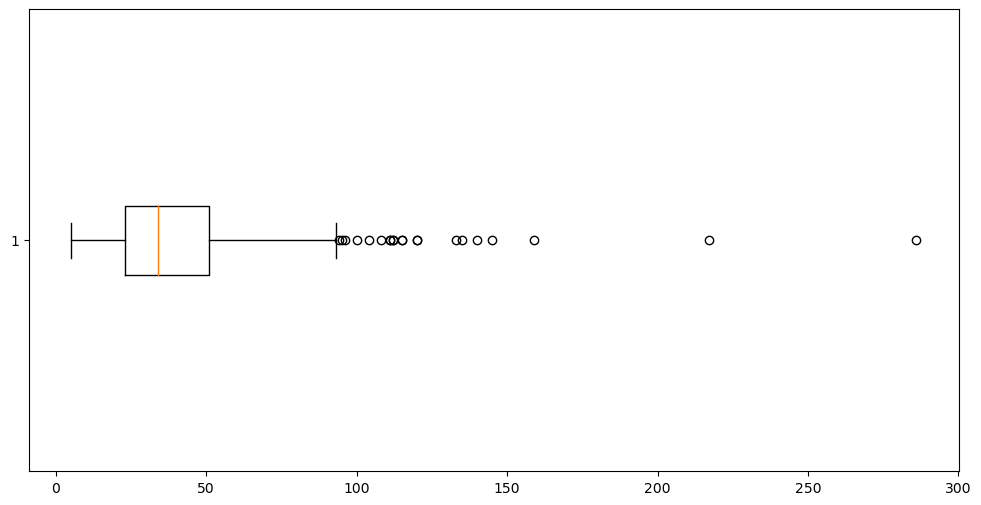

In [16]:
fig, ax = plt.subplots(figsize = (12, 6))

ax.boxplot(미세먼지['미세먼지(㎍/㎥)'], vert=False)

plt.show()

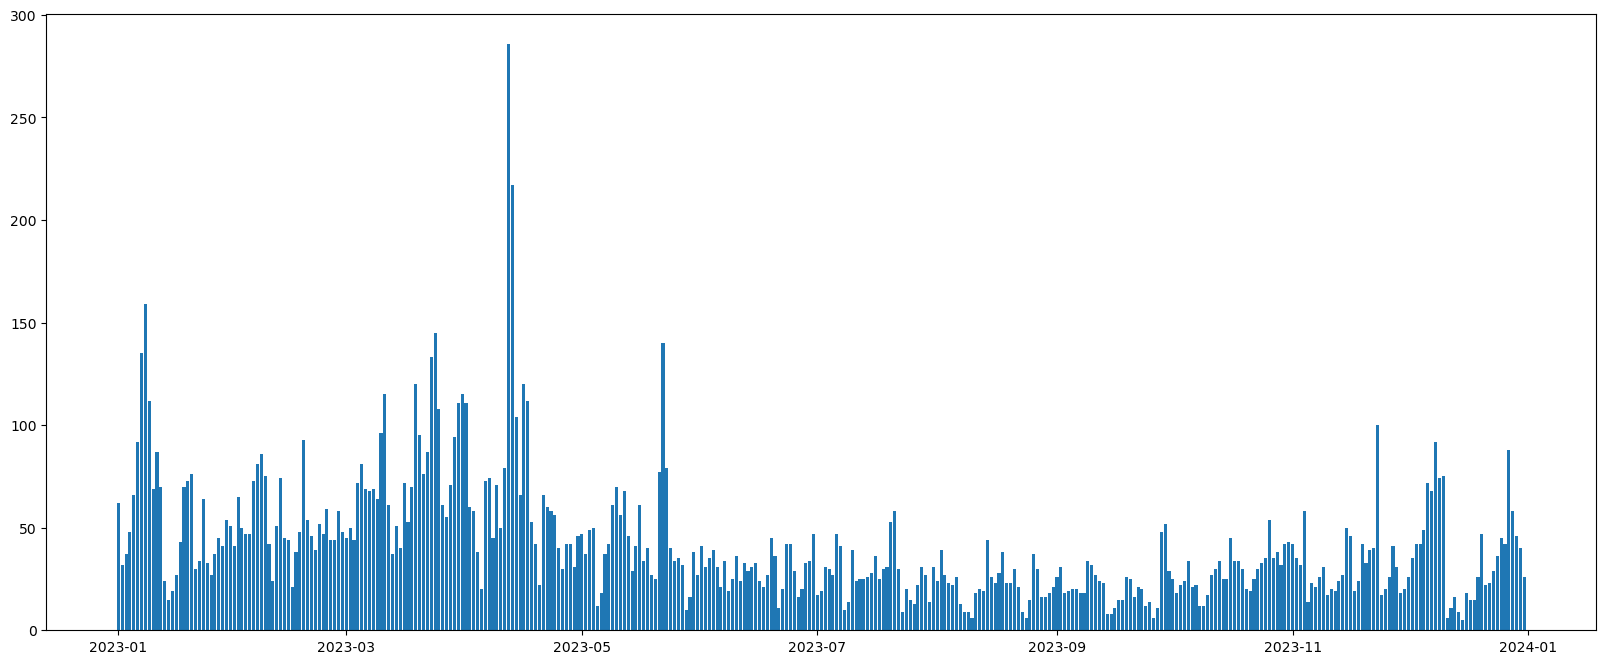

In [20]:
# 바 그래프

fig, ax = plt.subplots(figsize = (20, 8))

ax.bar(미세먼지['기준_날짜'], 미세먼지['미세먼지(㎍/㎥)'], label = '미세먼지')
# ax.bar(미세먼지['기준_날짜'], 미세먼지['초미세먼지(㎍/㎥)'], label = '초미세먼지')

plt.show()